In [ ]:
import numpy as np
import pyfftw as pfft
import cupy as cp

from IO import cfl
from FFT import fft
from util import process_3d
from util import phase_3d
from scipy import sparse
from scipy import optimize

from NUFFT import nufft
from util import imshow_3d

In [1]:
from NUFFT import nufft
from util import imshow_3d
from IO import cfl
import numpy as np

In [2]:
traj = cfl.readcfl('./phantom_traj')
dcf = cfl.readcfl('./phantom_dcf')
data = cfl.readcfl('./phantom_data')
img = cfl.readcfl('./phantom_img')

In [3]:
NFT = nufft.NUFFT3D(np.real(traj),pattern = dcf,seg = 1000000,Toeplitz_flag = True)
img1 = NFT.Toeplitz(img)


Est. Matrix size: [[-192  192]
 [-128  128]
 [ -13   13]]
Grid time: 15.507339000701904
Grid time: 32.17596793174744
Grid time: 46.40554690361023
Grid time: 61.29008889198303
Grid time: 78.30881381034851
Grid time: 81.5045018196106


In [4]:
import time

t0 = time.time()
img1 = NFT.Toeplitz(img)
print('Toeplitz time:',time.time()-t0)

Toeplitz time: 2.6556310653686523


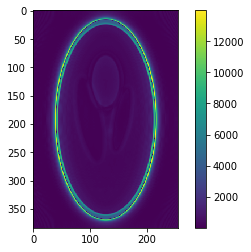

In [7]:
imshow_3d.imshow3d(np.abs(img1[:,:,12]))

In [ ]:
traj = cfl.readcfl('../../data/UWUTE_Vo_traj')
dcf = cfl.readcfl('../../data/UWUTE_Vo_dcf')
data = cfl.readcfl('../../data/UWUTE_Vo_data')

In [ ]:
import numpy as np
from numba import jit
import time
import NUFFT.nufft_util1 as nu1
import util.process_3d as p3

In [ ]:
N = 100000
o1 = np.array([0.])
o2 = np.array([0.])[:,None]
ind = np.zeros(N).astype(int)
r1 = np.random.randn(N)
r2= np.random.randn(N)

t0 = time.time()
np.add.at(o1,ind,r1*r2)
t1 = time.time()
o2 = nu1.cadd2(o2,ind[:,None],r1[:,None],r2[:,None,None])
t2 = time.time()
o3 = np.sum(r1*r2)
t3 = time.time()
print(t1-t0,t2-t1,t3-t2)
print(o1,o2,o3)

In [ ]:
a = np.ones((2,2,2))
b = (6,2,8)
p3.resize(a,b).shape


In [ ]:
[1,2,3]*2